In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Data Pre-Processing
Training Image Pre-Processing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128 ),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 6270 files belonging to 38 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128 ),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 3919 files belonging to 38 classes.


In [6]:
training_set   #Type of Prefetch Dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[115.5  111.5  108.5 ]
   [117.75 113.75 110.75]
   [121.25 117.25 114.25]
   ...
   [141.5  136.5  140.5 ]
   [137.25 132.25 136.25]
   [138.25 133.25 137.25]]

  [[115.25 111.25 108.25]
   [116.25 112.25 109.25]
   [117.5  113.5  110.5 ]
   ...
   [138.   133.   137.  ]
   [140.5  135.5  139.5 ]
   [136.75 131.75 135.75]]

  [[118.   114.   111.  ]
   [118.5  114.5  111.5 ]
   [119.   115.   112.  ]
   ...
   [144.75 139.75 143.75]
   [140.75 135.75 139.75]
   [145.25 140.25 144.25]]

  ...

  [[153.   148.   154.  ]
   [160.5  155.5  161.5 ]
   [145.25 140.25 146.25]
   ...
   [148.25 141.25 148.25]
   [155.75 148.75 155.75]
   [149.   142.   149.  ]]

  [[147.   142.   148.  ]
   [150.5  145.5  151.5 ]
   [146.5  141.5  147.5 ]
   ...
   [152.75 145.75 152.75]
   [148.5  141.5  148.5 ]
   [148.25 141.25 148.25]]

  [[149.5  144.5  150.5 ]
   [152.   147.   153.  ]
   [146.   141.   147.  ]
   ...
   [151.   144.   151.  ]
   [151.   144.   151.  ]
   [146.75 139.75 14

In [8]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [9]:
model=Sequential()

In [10]:
#Building Convolution Layer
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/Users/mousamdeb8/Documents/Btech NIT/B.Tech 6th Semester/CS-321A(Machine Learning &Artificial Intelligence)/AI_ML Lab/ladduu_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Dropout(0.25)) #To avoid overfitting

In [16]:
model.add(Flatten())

In [17]:
#Dense Layer also known as hidden layer
model.add(Dense(units=1500,activation='relu'))

In [18]:
model.add(Dropout(0.4))

In [19]:
#Output Layer (We have 32 classes so we need 38 new outputs)
model.add(Dense(units=38,activation='softmax'))

Compiling Model

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │    12,289,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,058,762 (65.07 MB)

 Trainable params: 17,058,762 (65.07 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 186s 943ms/step - accuracy: 0.3156 - loss: 3.0424 - val_accuracy: 0.1998 - val_loss: 2.7321
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.5222 - loss: 1.8672 - val_accuracy: 0.3664 - val_loss: 2.1606
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.6628 - loss: 1.2061 - val_accuracy: 0.5134 - val_loss: 1.6097
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.7384 - loss: 0.9094 - val_accuracy: 0.6076 - val_loss: 1.2851
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.8078 - loss: 0.6218 - val_accuracy: 0.6601 - val_loss: 1.1060
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 244s 1s/step - accuracy: 0.8474 - loss: 0.4896 - val_accuracy: 0.6701 - val_loss: 1.1171
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.8845 - loss: 0.3619 - val_accuracy: 0.7461 - val_loss: 0.9070
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.9137 - loss: 0.2728 - val_a

Model Evaluation

In [23]:
#Model Evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 213ms/step - accuracy: 0.9757 - loss: 0.0780


In [24]:
print(train_loss,train_acc)

0.06700461357831955 0.979904294013977


In [25]:
#Model on Validation Set
val_loss,val_acc = model.evaluate(validation_set)

123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 207ms/step - accuracy: 0.7259 - loss: 1.0267


In [26]:
print(val_loss,val_acc)

1.0296739339828491 0.7353916764259338


Saving Model(if we want to  use our model for future, if we are going to build a web app we cant always run the model all the time and use this model)

In [27]:
model.save("trainee_model.keras") #Updated way to save our model in compressed way

In [28]:
training_history.history

{'accuracy': [0.3813396990299225,
  0.5480063557624817,
  0.678149938583374,
  0.74130779504776,
  0.8100478649139404,
  0.8465709686279297,
  0.8888357281684875,
  0.9138755798339844,
  0.9293460845947266,
  0.9304625391960144],
 'loss': [2.700308322906494,
  1.7198317050933838,
  1.138079047203064,
  0.8690528869628906,
  0.5999382138252258,
  0.48613861203193665,
  0.34620580077171326,
  0.27043893933296204,
  0.2180936187505722,
  0.21921657025814056],
 'val_accuracy': [0.19979587197303772,
  0.3664200007915497,
  0.5133962631225586,
  0.6075529456138611,
  0.6601173877716064,
  0.6700689196586609,
  0.7461087107658386,
  0.6733860969543457,
  0.6843582391738892,
  0.7353916764259338],
 'val_loss': [2.732099771499634,
  2.160637140274048,
  1.6097221374511719,
  1.285084843635559,
  1.1059582233428955,
  1.1171376705169678,
  0.9070150256156921,
  1.2009048461914062,
  1.2654539346694946,
  1.0296739339828491]}

In [29]:
#Recording  Train History in json
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

In [30]:
training_history.history['val_accuracy']

[0.19979587197303772,
 0.3664200007915497,
 0.5133962631225586,
 0.6075529456138611,
 0.6601173877716064,
 0.6700689196586609,
 0.7461087107658386,
 0.6733860969543457,
 0.6843582391738892,
 0.7353916764259338]

Accuracy Visualisation

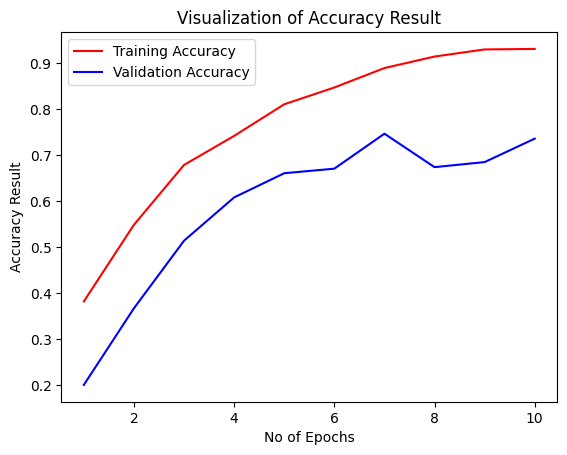

In [32]:

epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

Some other metrics for Model Evaluation

In [33]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128 ),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 3919 files belonging to 38 classes.


In [36]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

123/123 ━━━━━━━━━━━━━━━━━━━━ 26s 207ms/step


(array([[4.0795836e-01, 8.5325427e-03, 2.2799541e-05, ..., 5.8798091e-06,
         3.4068998e-07, 1.6218457e-05],
        [1.8045641e-01, 2.2770943e-04, 1.0935519e-07, ..., 1.0791042e-05,
         3.9316433e-06, 2.2486570e-06],
        [9.9223047e-01, 7.6410311e-07, 3.5603923e-10, ..., 1.5175775e-08,
         4.3641668e-09, 2.9743721e-09],
        ...,
        [1.2928105e-07, 1.1790426e-04, 2.9488514e-09, ..., 6.3389259e-12,
         1.6129223e-06, 9.9981254e-01],
        [2.5568863e-08, 2.0894270e-06, 9.0633065e-08, ..., 2.0882822e-09,
         9.0052583e-07, 9.6696866e-01],
        [4.9828483e-08, 5.2941775e-08, 1.7644810e-08, ..., 1.2042116e-10,
         5.3712345e-08, 9.9748272e-01]], dtype=float32),
 (3919, 38))

In [37]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(3919,), dtype=int64, numpy=array([ 0, 31,  0, ..., 37, 37, 37])>

In [38]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

2025-05-02 22:57:45.273565: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(3919, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [39]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(3919,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.67      0.67      0.67       100
                                 Apple___Black_rot       0.55      0.96      0.70       110
                          Apple___Cedar_apple_rust       0.71      0.50      0.59       110
                                   Apple___healthy       0.65      0.63      0.64       110
                               Blueberry___healthy       0.60      0.69      0.64       110
          Cherry_(including_sour)___Powdery_mildew       0.91      0.57      0.70       110
                 Cherry_(including_sour)___healthy       0.88      0.73      0.80       110
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.65      0.75       110
                       Corn_(maize)___Common_rust_       0.84      0.97      0.90       110
               Corn_(maize)___Northern_Leaf_Blight       0.81      0.83      0.

Calculate Confusion Metrix for our model

In [42]:
#Define Varibale 
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[ 67,   8,   0, ...,   0,   0,   0],
       [  0, 106,   0, ...,   0,   0,   0],
       [  0,   0,  55, ...,   2,   0,   0],
       ...,
       [  0,   0,   0, ...,  84,   0,   0],
       [  0,   0,   0, ...,   0,  87,   0],
       [  0,   0,   0, ...,   0,   0,  94]])

In [43]:
#Define Varibale 
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

Visualisation of Confusion Metrix

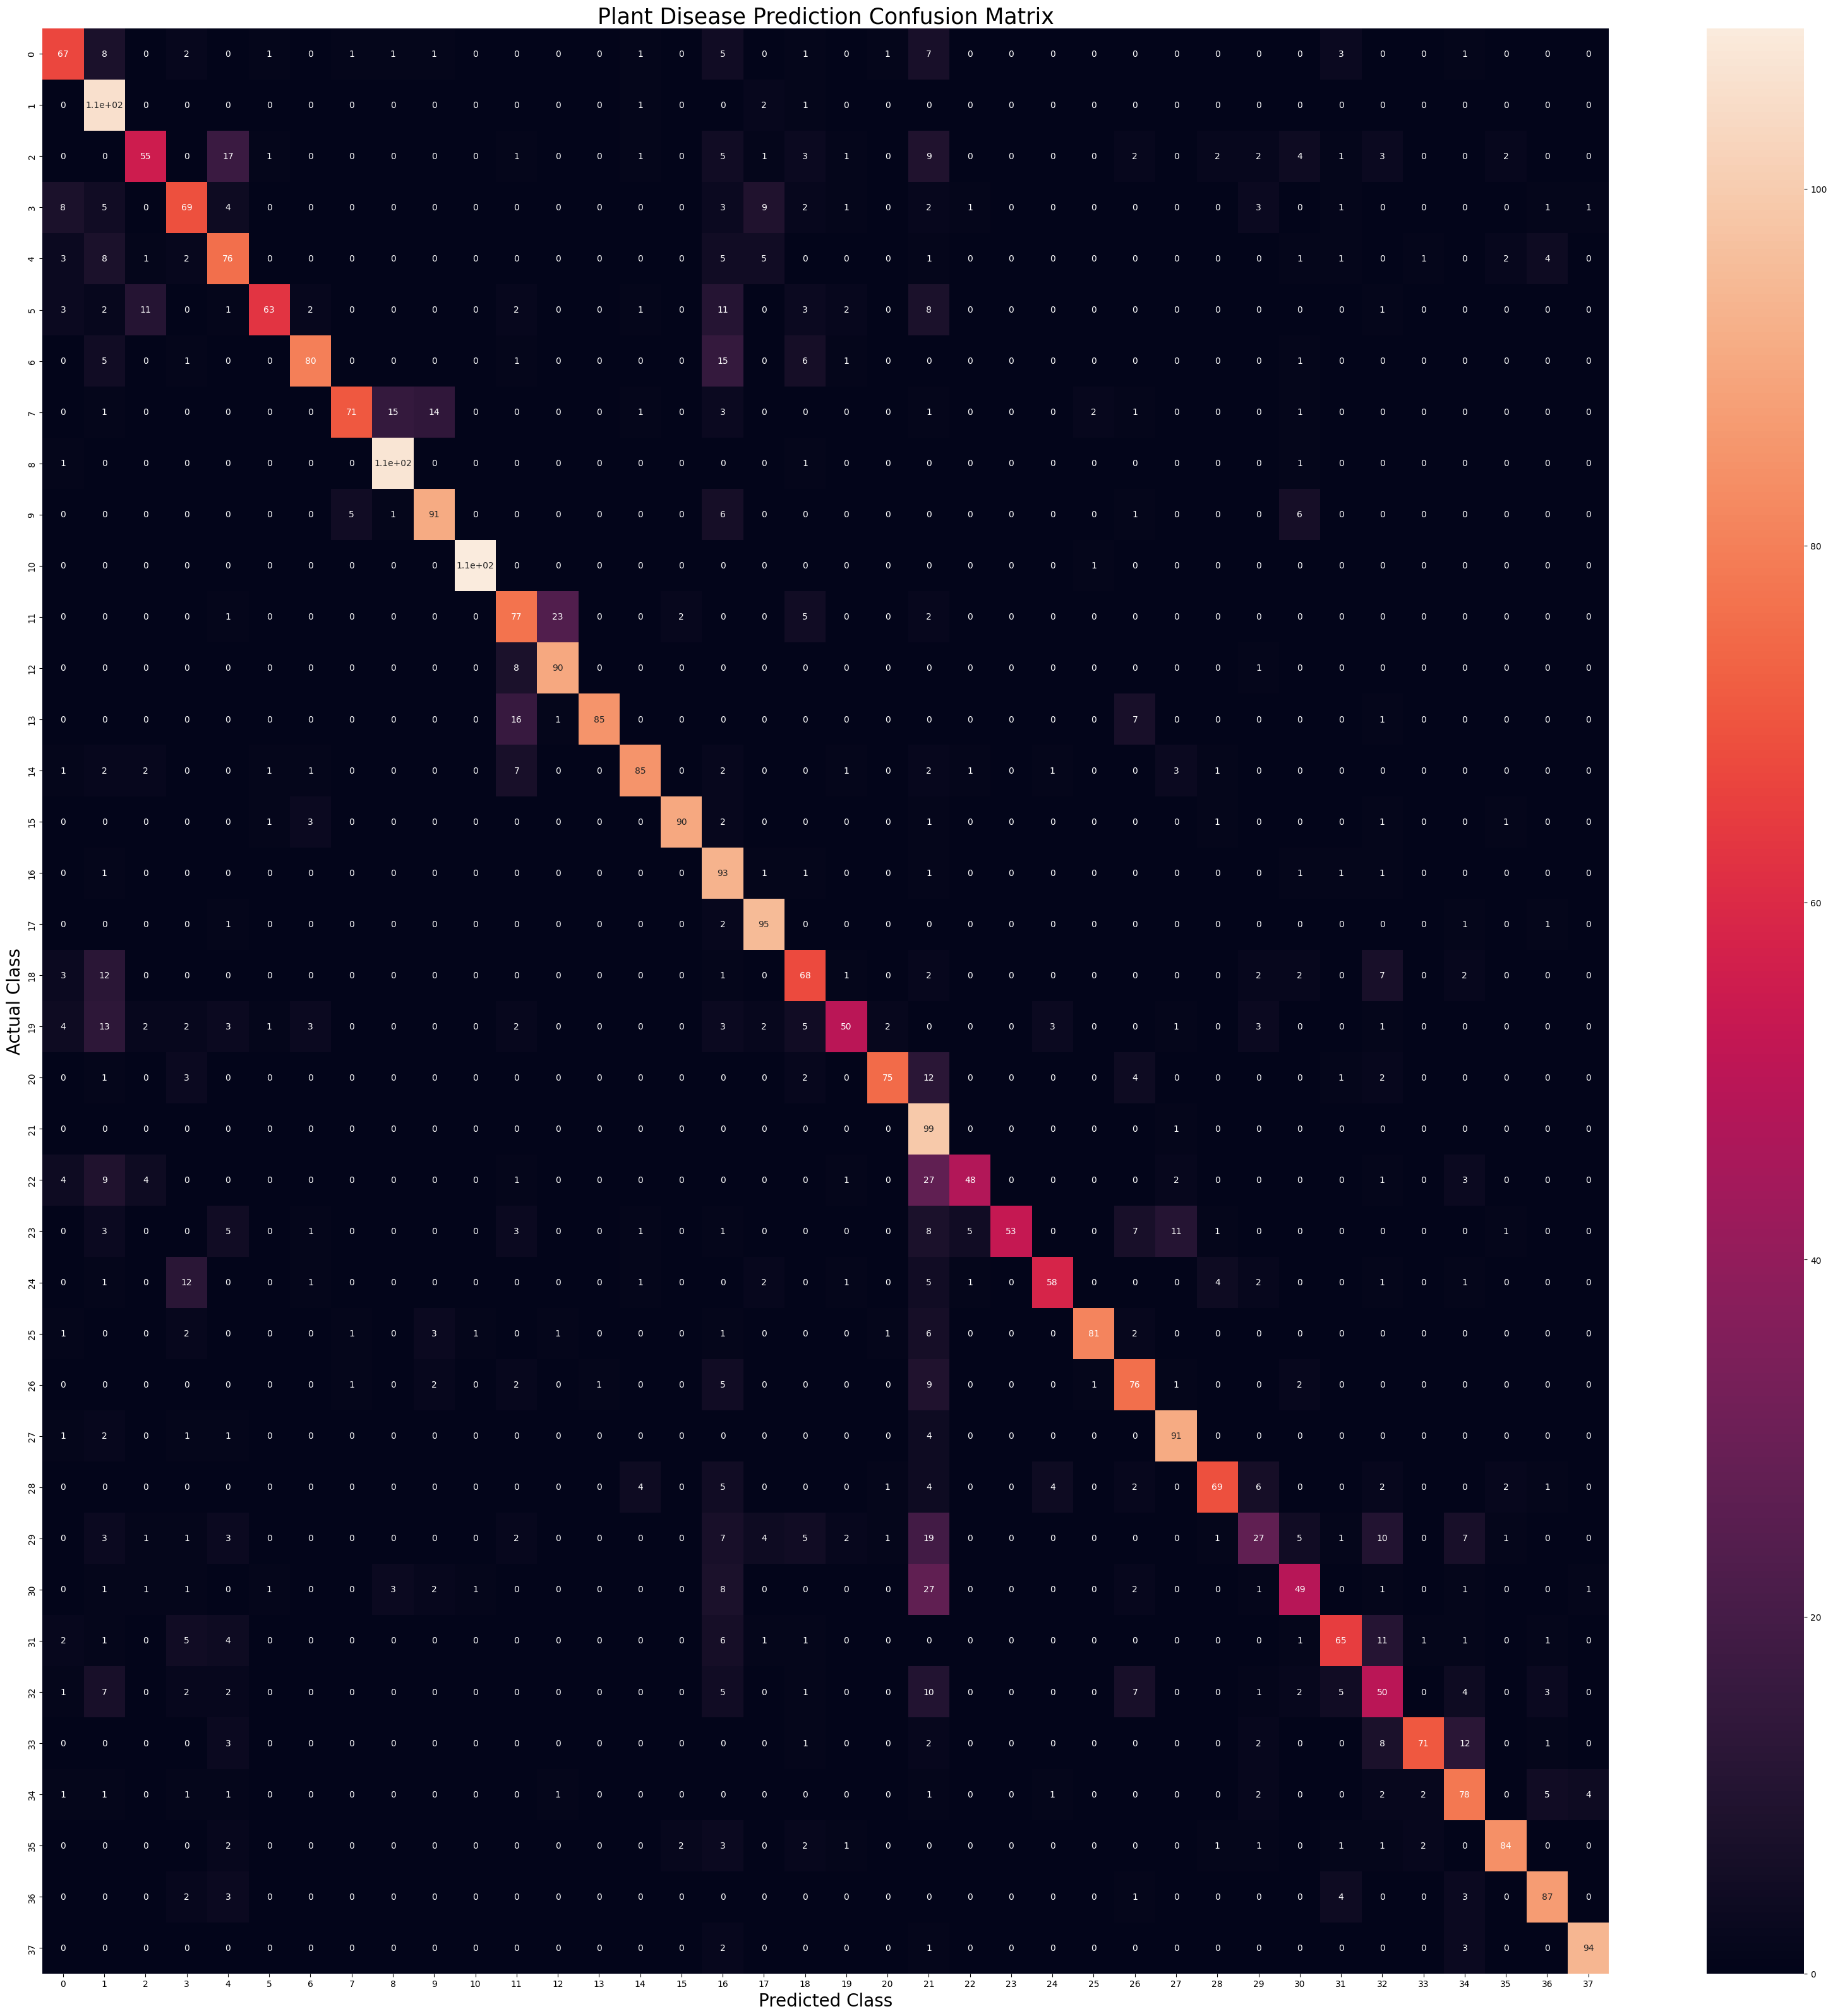

In [44]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True) #Giving some value on each element of the matrix. 
plt.xlabel("Predicted Class", fontsize= 20)
plt.ylabel("Actual Class", fontsize = 20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)
plt.show()